# 🏡 House Rent – Exploratory Data Analysis & Pre-Processing

## 📌 Project Overview
This project focuses on performing **Exploratory Data Analysis (EDA)** and **Data Pre-processing** on a House Rent dataset.  
The goal is to clean, transform, and prepare the dataset for further modeling or analytical tasks.

### 📝 Problem Statement

The primary objective of this project is to preprocess and analyze a house rent dataset to understand how property characteristics influence rental prices across different cities. The dataset contains unstructured, inconsistent, and missing information—particularly in fields like floor details and locality descriptions—which requires cleaning, feature extraction, and transformation. Through exploratory data analysis (EDA), the project aims to uncover patterns and relationships between rent and key factors such as area type, furnishing status, city, floor level, and property size. The final goal is to prepare a clean, structured dataset that enables accurate insights and supports future predictive modeling.

### 📘 Abstract

This project focuses on performing thorough data preprocessing and exploratory data analysis on a real-world house rent dataset. The preprocessing steps involve handling missing and duplicate values, extracting numerical information from text-based fields (e.g., current floor, total floors), removing irrelevant features, and generating meaningful new variables such as rent per square foot. EDA techniques—including statistical summaries and visualizations—are applied to identify trends and understand how different property features affect rental prices. The cleaned dataset and insights generated from this analysis provide a strong foundation for further machine learning models or decision-making tasks related to property rental pricing.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing House Rent File

In [5]:
df = pd.read_csv(r"C:\Users\kunal\Downloads\House_Rent_Dataset.csv")
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [6]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [8]:
print("Initial DataFrame Info:")
df.info()

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


Summarize missing value patterns: which columns have missing data, percent missing, and the chosen strategy to handle them (drop, fill with median/mode, or flag). Explain why the chosen strategy is appropriate.

In [9]:
df.shape

(4746, 12)

In [10]:
df['Posted On'] = pd.to_datetime(df['Posted On'])   #Converting 'posted on' column changing Dtype

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   Floor              4746 non-null   object        
 5   Area Type          4746 non-null   object        
 6   Area Locality      4746 non-null   object        
 7   City               4746 non-null   object        
 8   Furnishing Status  4746 non-null   object        
 9   Tenant Preferred   4746 non-null   object        
 10  Bathroom           4746 non-null   int64         
 11  Point of Contact   4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 445.1+ KB


### We use a lambda function to handle different floor descriptions like 'Ground' or 'Lower Basement'

In [12]:
df['Floor Number'] = df['Floor'].apply(lambda x: int(x.split(' out of ')[0]) if x.split(' ')[0].isdigit() else (0 if x.split(' ')[0].lower() == 'ground' else -1))

Explain how the floor feature was normalized (e.g., converting 'Ground'/'Basement'/ '1 out of 2' to numeric). Mention any assumptions and how missing/ambiguous values were handled

In [13]:
df['Total Floors'] = df['Floor'].apply(lambda x: int(x.split(' out of ')[1]) if 'out of' in x else -1)

Extracts the total number of floors from the "X out of Y" format.
If the pattern doesn't exist, assigns -1 to mark unknown values.

In [14]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floors
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,4
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3,5
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23,34


In [15]:
df.columns     #Total 14 columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact', 'Floor Number', 'Total Floors'],
      dtype='object')

In [16]:
df.Rent.describe()

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

In [17]:
def extract_floor(x):
    parts = x.split(' out of ')
    
    # current floor
    if "Ground" in parts[0]:
        current = 0
    elif parts[0].strip().isdigit():
        current = int(parts[0].strip())
    else:
        current = np.nan

    # total floors
    if len(parts) > 1 and parts[1].strip().isdigit():
        total = int(parts[1].strip())
    else:
        total = np.nan

    return pd.Series([current, total])

This function extracts two numerical values from the "X out of Y" floor format:

 ➤. Current floor (converts “Ground” to 0 and digits to integers)

 ➤. Total floors (extracts the number after "out of")

If the format is invalid, it returns NaN for those values.

In [18]:
df[['Current Floor', 'Total Floors']] = df['Floor'].apply(extract_floor)

Splits the Floor column into two new numeric features — Current Floor and Total Floors — using the custom extract_floor() function for cleaner analysis.

In [19]:
df.drop(columns=['Floor', 'Area Locality', 'Point of Contact'], inplace=True)   #Drop Irrelevant Columns

Removes irrelevant columns (Floor, Area Locality, Point of Contact) to simplify the dataset and keep only useful features.

In [20]:
df['rent_per_sqft'] = df['Rent'] / df['Size']     # create rent per square foot feature

Creates a new feature rent_per_sqft to standardize rent values by property size, making comparisons more meaningful.

In [21]:
df.describe(include="all")

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Floor Number,Total Floors,Current Floor,rent_per_sqft
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746.000000,4746.000000,4742.000000,4712.000000,4746.000000
unique,NaN,NaN,NaN,NaN,3,6,3,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Super Area,Mumbai,Semi-Furnished,Bachelors/Family,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,2446,972,2251,3444,NaN,NaN,NaN,NaN,NaN
mean,2022-06-07 18:01:40.126422272,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,1.965866,3.438475,6.973429,3.470501,39.257087
min,2022-04-13 00:00:00,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,1.000000,-1.000000,1.000000,0.000000,0.571429
25%,2022-05-20 00:00:00,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,2.000000,1.000000,13.333333
50%,2022-06-10 00:00:00,2.000000,1.600000e+04,850.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,4.000000,2.000000,20.000000
75%,2022-06-28 00:00:00,3.000000,3.300000e+04,1200.000000,NaN,NaN,NaN,NaN,2.000000,3.000000,6.000000,3.000000,42.005986
max,2022-07-11 00:00:00,6.000000,3.500000e+06,8000.000000,NaN,NaN,NaN,NaN,10.000000,76.000000,89.000000,76.000000,1500.000000


Shows summary statistics for all columns, helping identify data distribution, missing values, outliers, and overall feature characteristics.

In [22]:
print(df.isnull().sum())  #Checking Missing values

Posted On             0
BHK                   0
Rent                  0
Size                  0
Area Type             0
City                  0
Furnishing Status     0
Tenant Preferred      0
Bathroom              0
Floor Number          0
Total Floors          4
Current Floor        34
rent_per_sqft         0
dtype: int64


Summarize missing value patterns: which columns have missing data, percent missing, and the chosen strategy to handle them (drop, fill with median/mode, or flag). Explain why the chosen strategy is appropriate.

In [23]:
df["Total Floors"].value_counts()/len(df)*100

Total Floors
4.0     19.764012
3.0     19.258323
2.0     18.289086
5.0      8.891698
1.0      7.016435
          ...    
62.0     0.021070
54.0     0.021070
85.0     0.021070
71.0     0.021070
81.0     0.021070
Name: count, Length: 66, dtype: float64

Displays the percentage distribution of each Total Floors value, helping identify which building heights are most common in the dataset.

In [24]:
df["Total Floors"].min()

1.0

Returns the minimum value of Total Floors, helping identify the smallest building height in the dataset.

In [25]:
df["Total Floors"].fillna(df["Total Floors"].min(),inplace=True) #Filling null values in floors

Fills missing Total Floors values with the minimum floor count, ensuring the column has no nulls.

In [26]:
df.isnull().sum()

Posted On             0
BHK                   0
Rent                  0
Size                  0
Area Type             0
City                  0
Furnishing Status     0
Tenant Preferred      0
Bathroom              0
Floor Number          0
Total Floors          0
Current Floor        34
rent_per_sqft         0
dtype: int64

In [27]:
df.isnull().sum()/len(df)*100

Posted On            0.000000
BHK                  0.000000
Rent                 0.000000
Size                 0.000000
Area Type            0.000000
City                 0.000000
Furnishing Status    0.000000
Tenant Preferred     0.000000
Bathroom             0.000000
Floor Number         0.000000
Total Floors         0.000000
Current Floor        0.716393
rent_per_sqft        0.000000
dtype: float64

In [28]:
df["Current Floor"].min()

0.0

Returns the minimum value of Current Floor, showing the lowest floor level present in the dataset.

In [29]:
df["Current Floor"].fillna(df["Current Floor"].min(),inplace=True)     #Filling Null Values

Replaces missing Current Floor values with the minimum floor level to ensure no nulls remain in the column.

In [30]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Floor Number         0
Total Floors         0
Current Floor        0
rent_per_sqft        0
dtype: int64

In [31]:
df

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Floor Number,Total Floors,Current Floor,rent_per_sqft
0,2022-05-18,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,0,2.0,0.0,9.090909
1,2022-05-13,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,1,3.0,1.0,25.000000
2,2022-05-16,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,1,3.0,1.0,17.000000
3,2022-07-04,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,1,2.0,1.0,12.500000
4,2022-05-09,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,1,2.0,1.0,8.823529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,3,5.0,3.0,15.000000
4742,2022-05-15,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,1,4.0,1.0,14.500000
4743,2022-07-10,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,3,5.0,3.0,20.000000
4744,2022-07-06,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,23,34.0,23.0,30.000000


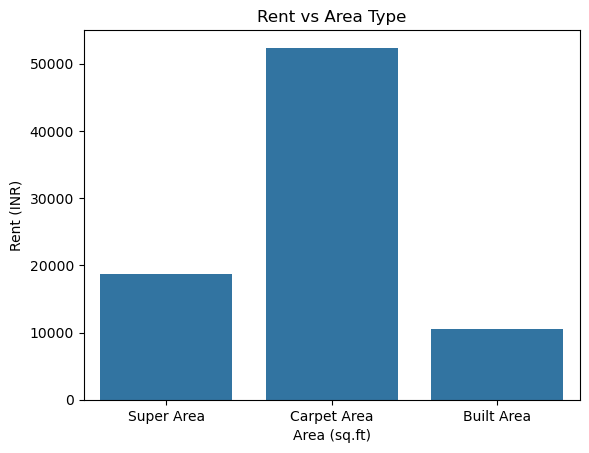

In [32]:
# Scatterplot of Rents Vs Area Type
sns.barplot(x='Area Type', y='Rent', data=df, ci=0)

plt.title("Rent vs Area Type")
plt.xlabel("Area (sq.ft)")
plt.ylabel("Rent (INR)")
plt.show()


Shows how average rent varies across different Area Types, helping identify which area categories tend to be more expensive.

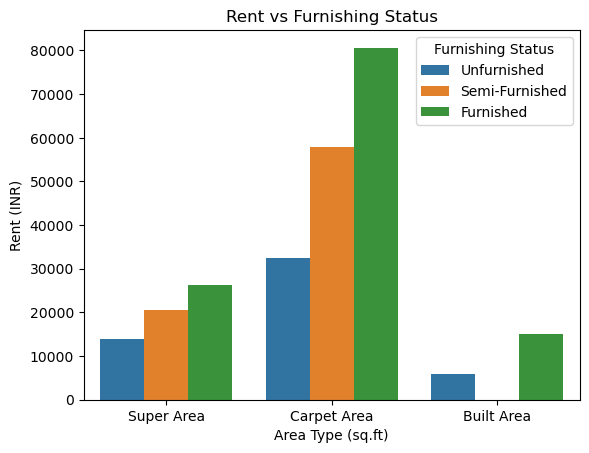

In [33]:
#Scatterplot Rent Vs Furnishing Status
sns.barplot(x='Area Type', y='Rent', hue='Furnishing Status', data=df, ci=0)

plt.title("Rent vs Furnishing Status")
plt.xlabel("Area Type (sq.ft)")
plt.ylabel("Rent (INR)")
plt.show()


Compares rent across Area Types while highlighting differences by Furnishing Status, helping identify which furnishing levels lead to higher rental prices.

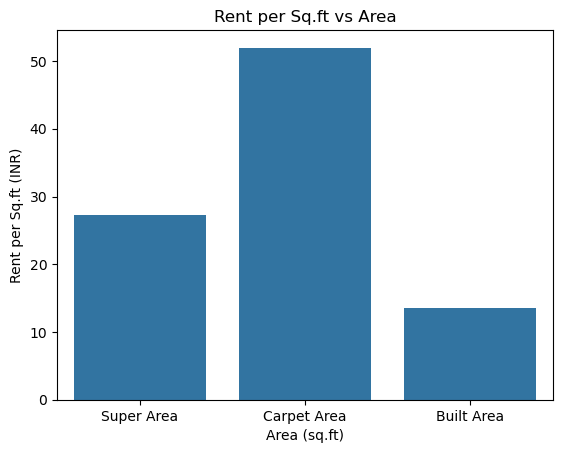

In [34]:
#Scallterplot Area Type Vs Rent per sq.ft
sns.barplot(x='Area Type', y='rent_per_sqft', data=df , ci=0)

plt.title("Rent per Sq.ft vs Area")
plt.xlabel("Area (sq.ft)")
plt.ylabel("Rent per Sq.ft (INR)")
plt.show()


Shows how rent per square foot differs across Area Types, helping identify which areas offer higher or lower price-per-unit space.

Text(0.5, 1.0, 'Rent vs City')

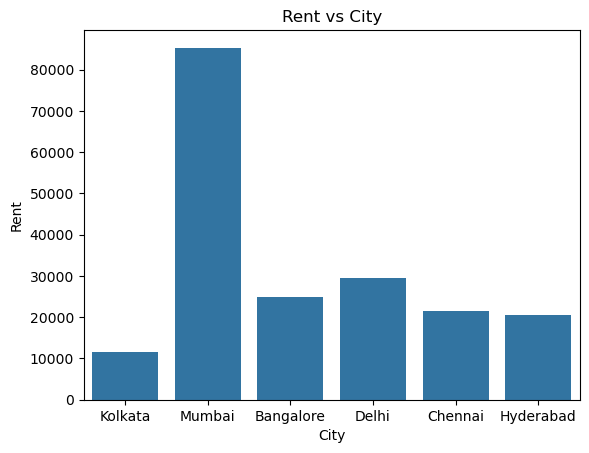

In [35]:
sns.barplot(x='City', y='Rent',ci=0, data= df)

plt.title("Rent vs City")

✅ Summary

     ➤ Cleaned and preprocessed the dataset by handling missing values, fixing inconsistent formats, and removing irrelevant columns.

     ➤ Extracted useful features such as Current Floor, Total Floors, and Rent per Sq.ft for deeper insights.

     ➤ Performed exploratory analysis to understand how rent varies with Area Type, Furnishing Status, City, and property size.

     ➤ Identified key patterns like price differences across cities and area categories, along with variation in rent efficiency (rent per sq.ft).

Final dataset is now structured, consistent, and ready for model building or advanced analysis.